Predict a classification- survival or deceased in the TITANIC SHIP tragedy based on the various factors

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Reading the data from csv file**

In [2]:
train = pd.read_csv('titanic_train.csv')
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Since many datas are missing, let's visualize it

**Explanatory Analysis**

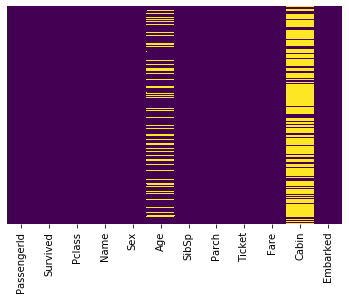

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar= False,cmap='viridis')

In [4]:
sns.set_style('whitegrid')

C:\Users\buttercup\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\buttercup\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


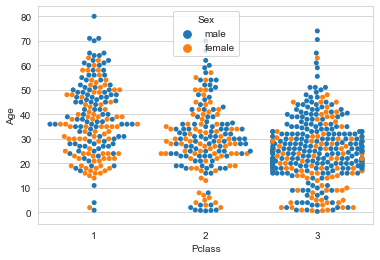

In [5]:
sns.swarmplot(x='Pclass', y='Age', hue='Sex',data= train)

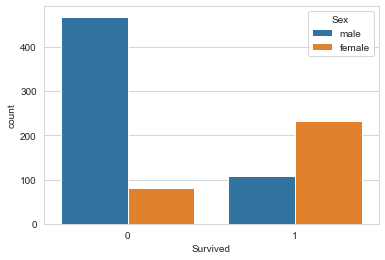

In [6]:
sns.countplot(x='Survived', data = train, hue='Sex')

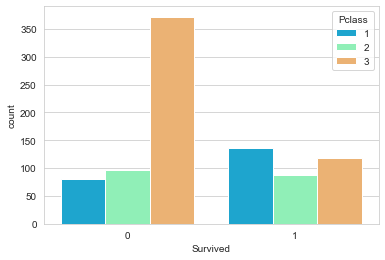

In [7]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

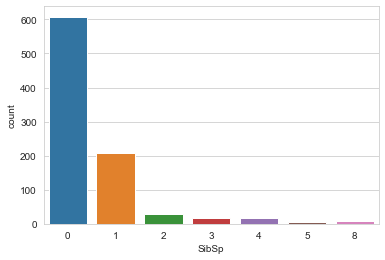

In [8]:
sns.countplot(x='SibSp', data=train)

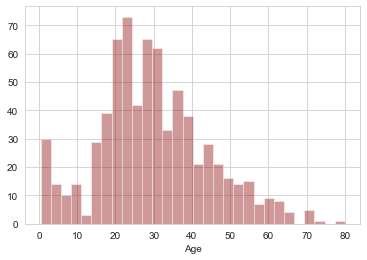

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

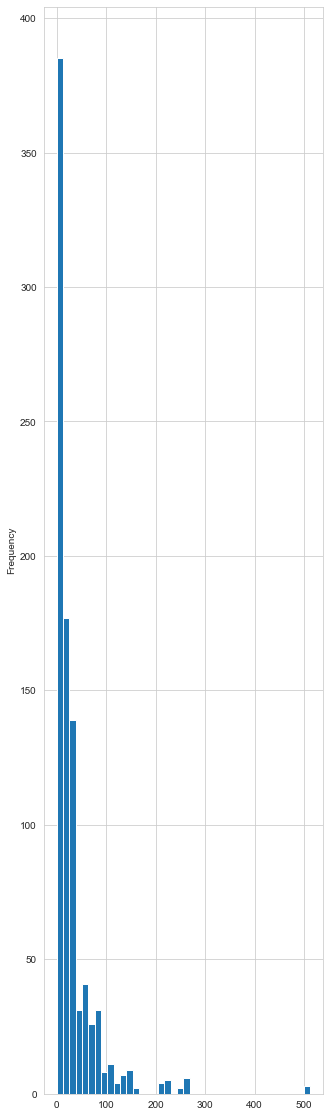

In [10]:
train['Fare'].plot.hist(bins=40,figsize=(5,20))

**Making interactive plots using cufflinks**

In [11]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [12]:
train['Fare'].iplot(kind='hist', bins=30,color='green')

# DATA CLEANING
- Transfering our data into an acceptable form

imputation(to fill in)- filling the gap or missing data with the mean or average of the data

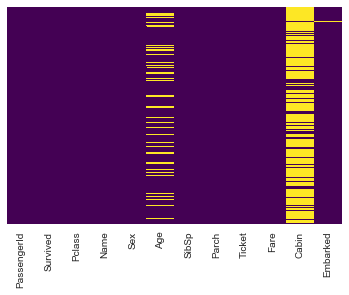

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Filling in the missing data of age with its average or mean

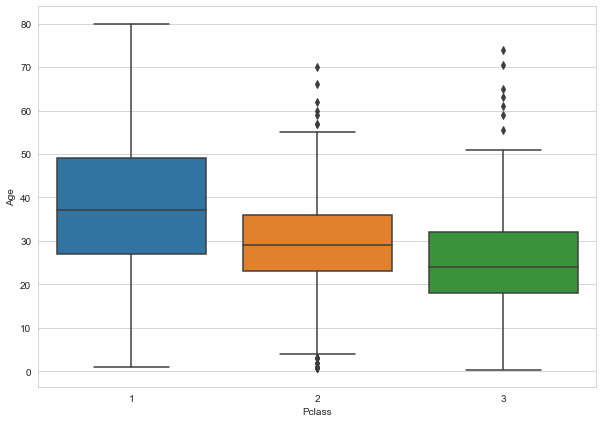

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age',data=train) 

In [15]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

defining a function for imputing the age column

In [16]:
def impute_age(cols):
    Age = cols[0]
    PClass = cols[1]
    if pd.isnull(Age):
        if PClass==1:
            return 38
        elif PClass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

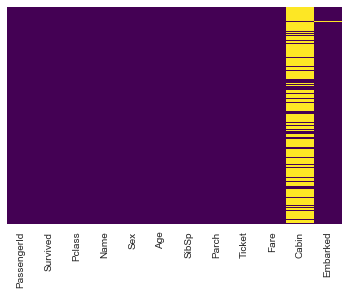

In [18]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [19]:
#Dropping the nealy empty column Cabin and NA values in Embarked column
train.drop('Cabin', axis=1, inplace=True)

In [20]:
train.dropna(inplace=True)

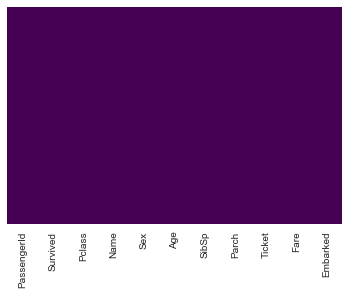

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Converting Categorical Features**

convert categorical features to dummy variables for machine learning algorithm to directly take in those features as inputs.

In [22]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
PClass = pd.get_dummies(train['Pclass'], drop_first=True)

In [23]:
train = pd.concat([train,sex,embark,PClass],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [24]:
train.drop(['Sex','Embarked','Name','Ticket','Pclass','PassengerId'],axis=1,inplace=True)

In [25]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Feature Engineering

In [26]:
def process_family_train():
    train['FamilySize'] = train['Parch']+train['SibSp']+1
    train['Singleton'] = train['FamilySize'].map(lambda s:1 if s==1 else 0)
    train['SmallFamily'] = train['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    train['LargeFamily'] = train['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    return train

In [27]:
train = process_family_train()
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,FamilySize,Singleton,SmallFamily,LargeFamily
0,0,22.0,1,0,7.2500,1,0,1,0,1,2,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,2,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,1,1,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,2,0,1,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,1,0,0


Reducing the title to Mr, Mrs, Miss and Master

In [28]:
'''train['Name'].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)
train.head()'''

"train['Name'].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)\ntrain.head()"

**Cleaning the test data**

In [40]:
test = pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


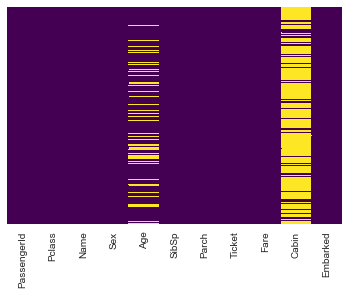

In [41]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
#removing column cabin
test.drop('Cabin',axis=1,inplace=True)

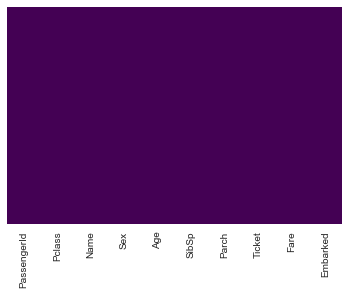

In [43]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Converting categorical features**

In [44]:
sext = pd.get_dummies(test['Sex'], drop_first=True)
embarkt = pd.get_dummies(test['Embarked'], drop_first=True)
PClasst = pd.get_dummies(test['Pclass'], drop_first=True)

In [45]:
test = pd.concat([test,sext,embarkt,PClasst],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [46]:
test.drop(['Sex','Embarked','Name','Ticket','Pclass','PassengerId'],axis=1,inplace=True) 
test.dropna(inplace=True)

In [48]:
def process_family_test():
    test['FamilySize'] = test['Parch']+test['SibSp']+1
    test['Singleton'] = test['FamilySize'].map(lambda s:1 if s==1 else 0)
    test['SmallFamily'] = test['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    test['LargeFamily'] = test['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    return test

In [49]:
test = process_family_test()
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,FamilySize,Singleton,SmallFamily,LargeFamily
0,34.5,0,0,7.8292,1,1,0,0,1,1,1,0,0
1,47.0,1,0,7.0000,0,0,1,0,1,2,0,1,0
2,62.0,0,0,9.6875,1,1,0,1,0,1,1,0,0
3,27.0,0,0,8.6625,1,0,1,0,1,1,1,0,0
4,22.0,1,1,12.2875,0,0,1,0,1,3,0,1,0


# Building a Logistic Regression model

In [50]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

**Training and Predicting**

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\buttercup\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
predictions = logmodel.predict(test)

In [59]:
acc_log = round(logmodel.score(X_train, y_train) * 100, 2)
acc_log

80.95

the test data seems to be incomplete, so lets split our train data
Another way of doing this is by splitting up the training data into test and train

**Spliting and training our data**

In [53]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived',axis=1)
y = train['Survived']
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.22,random_state=101)

In [54]:
logmodel.fit(X_train,y_train)
prediction = logmodel.predict(X_test)

C:\Users\buttercup\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Evaluation

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[108,   9],
       [ 25,  54]], dtype=int64)

Explaining the confusion matrix
total number of values = 196
**The number of true NO's = 108**
**The number of false NO's = 26**
**The number of false positives = 117**
**The number of true positives = 79**
  
# Accuracy:
          how often the predicted values are correct
          TP+TN/Total = 161/196
                          =0.82%

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       117
           1       0.86      0.68      0.76        79

    accuracy                           0.83       196
   macro avg       0.83      0.80      0.81       196
weighted avg       0.83      0.83      0.82       196



precision = what percent of your predicted values are correct ?
            TP/TP+FP
recall = what percent of the positive cases did you catch
            TP/TP+FN
f1-score = what percent of positive predicted cases were correct?
           2*(recall * precision)/recall+precision